In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score

Потренируемся на каком-то самом простом примере, чтобы понять логику

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Сначала нужно создать классификатор

In [3]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
X = data[['X_1', 'X_2']]
y = data.Y

    **Обучаем дерево решений**

In [5]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализация дерева решений

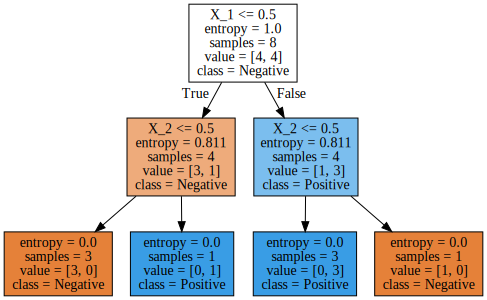

In [6]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

- **ЭНТРОПИЯ - УРОВЕНЬ НЕОПРЕДЕЛЕННОСТИ В ДАННЫХ.** Очень часто этот термин используют, при обсуждении темы решающих деревьев. Максимальный уровень энтропии = 1, когда уровень неопределенности равен случайному угадыванию.
- **IG - INFORMATION GAIN** какой выиграш мы получили, использую сплит по определенной фиче.

***ОПИСАНИЕ КОНЦЕПЦИИ ДЕРЕВА РЕШЕНИЙ*** Т.е. каким образом работает дерево решений: есть одна зависимая переменная и набор фичей, дерево решений на первом шаге перебирает все возможные сплиты по всем фичам и по всем его значениям (если переменная непрерывная - будет перебирать каждое значение) и выберет для первого сплита тот сплит, где INFORMATION GAIN был наибольший (т.е. где наибольше снизился уровень энтропии). И так далее дерево решений на каждом этапе будет перебирать все значения и брать те, где будет получаться максимальный INFORMATION GAIN. И так будет делать, пока все не поделит.


**ПРОБЛЕМА ПЕРЕОБУЧЕНИЯ** ***когда мы вместо того, чтобы вычленить какую-то закономерность в данных, пытаемся безошибочно классифицировать данный набор данных и в итоге получается что данное предсказание будет точно работать на предоставленных данных, но гораздо хуже справляться с новым набором данных.***

**TASK #1**

Обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

П.С. Я еще от себя добавила параметр mean_cross_val_score

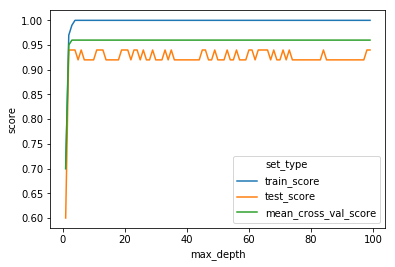

In [7]:
iris_train = pd.read_csv('/Users/avyny/ML-course-Python/Datasets for ML course/train_iris.csv', index_col = 0)
iris_test = pd.read_csv('/Users/avyny/ML-course-Python/Datasets for ML course/test_iris.csv', index_col = 0)
np.random.seed(0)
X_train = iris_train.drop('species', axis = 1)
y_train = iris_train.species
X_test = iris_test.drop('species', axis = 1)
y_test = iris_test.species


max_depth_value = range(1, 100)
scores_data = pd.DataFrame()
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score],
                                   'mean_cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'mean_cross_val_score'], 
                           var_name="set_type", value_name = "score")
sns.lineplot(x="max_depth", y = "score", hue = "set_type", data = scores_data_long)

**TASK #2**

Обучите на трейновых данных Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

43

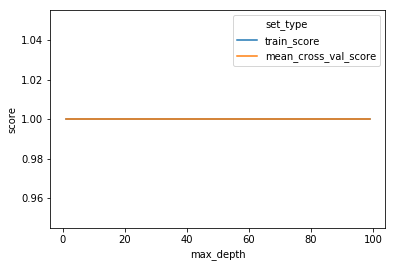

In [8]:
train = pd.read_csv('/Users/avyny/ML-course-Python/Datasets for ML course/dogs_n_cats.csv')
X_train = train.drop('Вид', axis=1)
y_train = train.Вид
y_train = y_train.replace({'собачка': [1],
                'котик': [0]})
X_test = pd.read_json('/Users/avyny/ML-course-Python/Datasets for ML course/dataset_209691_15.txt')
max_depth_value = range(1, 100)
scores_data = pd.DataFrame()
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score],
                                   'mean_cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

    
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'mean_cross_val_score'], 
                           var_name="set_type", value_name = "score")
sns.lineplot(x="max_depth", y = "score", hue = "set_type", data = scores_data_long)


best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 1)
best_clf.fit(X_train, y_train)
xx = best_clf.predict(X_test)
xx.sum()


**ИНФО по GridSearchCV**

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть <u>**RandomizedSearchCV!**</u> 

***Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.***